In [5]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from xgboost import plot_importance
import os

In [38]:
for f in os.listdir('Models'):
    model = pickle.load(open('Models/' + f, 'rb'))
    print('{}, {}'.format(f, model.best_score))

m_xgb_pca50_maxdepth8.pkl, 0.794488
m_xgb_pca50.pkl, 0.794743
m_xgb_pca50_maxdepth0.pkl, 0.792842
m_xgb_pca50_logitraw.pkl, 0.79374
m_xgb_pca50_hinge.pkl, 0.579112
m_xgb_org.pkl, 0.794138


In [4]:
model = pickle.load(open('Models/m_xgb_pca50_NoBalance.pkl', 'rb'))

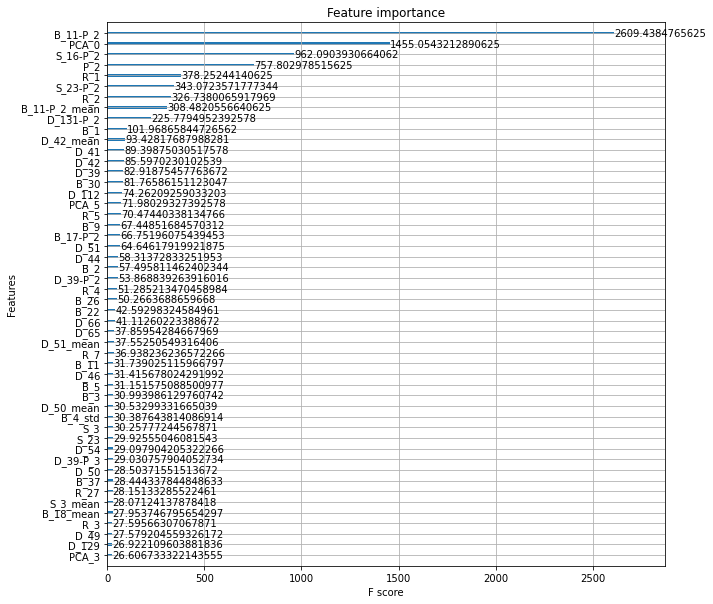

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_importance(model,importance_type = 'gain', max_num_features=50, ax=ax);

In [30]:
dic_score = model.get_score(importance_type='gain')
top_features = pd.DataFrame.from_dict(dic_score, orient='index', columns=['gain']).sort_values(by='gain', ascending=False) \
.index[:500]

In [35]:
top_features.to_frame().reset_index(drop=True).to_pickle('Models/top_features.pkl')